# Maximizing Conversion: A/B Testing Insights for Optimal Marketing Strategies

### Table of Contents

<ul>
    <li><a href="#introduction">Introduction</a></li>
    <li><a href="#setup">Setup</a></li>
    <li><a href="#assessing-data">Assessing Data</a></li>
    <li><a href="#cleaning-data">Cleaning Data</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#probability">Probability</a></li>
    <li><a href="#hypothesis">Hypothesis Testing</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id="introduction"></a>
## Introduction

Two ad campaigns were run by a company and now wants to know which campaign performed better in converting website clicks into purchases.


|     **Feature**     |                         **Description**                        |
|:-------------------:|:--------------------------------------------------------------:|
| Campaign Name       | Name of the campaign                                           |
| Date                | Date of the campaign                                           |
| Spend [USD]         | Amount spent on the campaign in USD                            |
| # of Impressions    | Impressions the ad made through the campaign                   |
| Reach               | Unique impressions the ad made                                 |
| # of Website Clicks | Website clicks received through the ad                         |
| # of Searches       | Number of users who performed searches on the website          |
| # of View Content   | Number of users who viewed content and products on the website |
| # of Add to Cart    | Number of users who added products to the cart                 |
| # of Purchase       | Number of purchases                                            |

### Hypotheses

Null hypothesis: The conversion rate for the test campaign is equal to or less than the conversion rate for the control campaign.

Alternative hypothesis: The conversion rate for the test campaign is greater than the conversion rate for the control campaign.

Conversion rate for this analysis will be defined as the number of purchases divided by the number of website clicks. 

Type 1 error rate of 5%

<a id="setup"></a>
## Setup

#### Import necessary libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

#### Gather data

Data used for this project was downloaded from Kaggle for the [A/B Testing DataSet](https://www.kaggle.com/datasets/amirmotefaker/ab-testing-dataset/data)

In [2]:
# Get data for test group
test_df = pd.read_csv('./data/test_group.csv', sep=';')

# Get data for control group
control_df = pd.read_csv('./data/control_group.csv', sep=';')

<a id="assessing-data"></a>
## Assessing Data

In [3]:
def check_for_dupes(data, col):
    """
    Checks for duplicate values in each column of a dataset (dupe or dupes)
    Returns column name, number of duplicated values, and list of duplicated values with frequency of each value (if applicable)

    Parameter
    -----------
    data : DataFrame
    col : Series from DataFrame
    """
    
    dupe_count = data[col].duplicated().sum()
    if dupe_count == 0:
        return f'{col} has {dupe_count} dupes\n'
    elif dupe_count == 1:
        return f'{col} has {dupe_count} dupe:\n{data[col].value_counts()}\n'
    else:
        return f'{col} has {dupe_count} dupes:\n{data[col].value_counts()}\n'

#### Assess the test campaign

In [4]:
# Get shape of data (rows, columns)
test_df.shape

(30, 10)

Thirty total records and 10 columns are included with this dataset

In [5]:
# Get idea of types of data and non-null counts
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


There are not any missing values in any of the columns.

The date column will be converted to datetime. Column names will be renamed to remove spaces and better understanding

In [6]:
# Show top of data
test_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [7]:
# Show bottom of data
test_df.tail()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
25,Test Campaign,26.08.2019,2311,80841,61589,3820,2037,1046,346,284
26,Test Campaign,27.08.2019,2915,111469,92159,6435,2976,2552,992,771
27,Test Campaign,28.08.2019,2247,54627,41267,8144,2432,1281,1009,721
28,Test Campaign,29.08.2019,2805,67444,43219,7651,1920,1240,1168,677
29,Test Campaign,30.08.2019,1977,120203,89380,4399,2978,1625,1034,572


The test campaign data has a single record for each day of the month for August in 2019. 

In [8]:
# Count of duplicated rows where all the column values are the same
test_df.duplicated().sum()

0

In [9]:
# Print out the duplicate values for each column in the data set
for col in test_df.columns:
    print(check_for_dupes(test_df, col), '\n', '--------------------------------------------', '\n')

Campaign Name has 29 dupes:
Campaign Name
Test Campaign    30
Name: count, dtype: int64
 
 -------------------------------------------- 

Date has 0 dupes
 
 -------------------------------------------- 

Spend [USD] has 0 dupes
 
 -------------------------------------------- 

# of Impressions has 0 dupes
 
 -------------------------------------------- 

Reach has 0 dupes
 
 -------------------------------------------- 

# of Website Clicks has 0 dupes
 
 -------------------------------------------- 

# of Searches has 1 dupe:
# of Searches
1995    2
1946    1
2661    1
1920    1
2432    1
2976    1
2037    1
2937    1
2687    1
2592    1
1983    1
2061    1
2924    1
2824    1
2537    1
2359    1
1979    1
2213    1
2081    1
2893    1
2312    1
2899    1
2867    1
2733    1
1854    1
2106    1
2216    1
2572    1
2978    1
Name: count, dtype: int64
 
 -------------------------------------------- 

# of View Content has 0 dupes
 
 -------------------------------------------- 

# of A

None of the dates are duplicated so each of the record can be considered unique. Other values can be duplicated since it is possible have duplicated values for the other columns.

#### Assess the control campaign

In [10]:
control_df.shape

(30, 10)

This dataset also has 30 records and 10 columns.

In [11]:
control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


There is a single missing value for all the columns except `Campaign Name`, `Date`, and `Spend [USD]` and this will need to be understood. 

Seven of the columns are floats and those columns were ints for the other dataset so this will also need to be addressed in the cleaning phase.

The `Date` column will be converted to datetime and the column names will also be renamed to match the test group.

In [12]:
control_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
control_df.tail()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
25,Control Campaign,26.08.2019,2233,124897.0,98432.0,5435.0,2847.0,2421.0,1448.0,251.0
26,Control Campaign,27.08.2019,2061,104678.0,91579.0,4941.0,3549.0,3249.0,980.0,605.0
27,Control Campaign,28.08.2019,2421,141654.0,125874.0,6287.0,1672.0,1589.0,1711.0,643.0
28,Control Campaign,29.08.2019,2375,92029.0,74192.0,8127.0,4891.0,4219.0,1486.0,334.0
29,Control Campaign,30.08.2019,2324,111306.0,88632.0,4658.0,1615.0,1249.0,442.0,670.0


The date range for the control campaign is the same as the test campaign (the month of August 2019).

The record for August 5th is the record with the missing values and will be addressed in the cleaning phase.

In [14]:
# Count of duplicated rows where all the column values are the same
control_df.duplicated().sum()

0

In [15]:
# Print out the duplicate values for each column in the data set
for col in control_df.columns:
    print(check_for_dupes(control_df, col), '\n', '--------------------------------------------', '\n')

Campaign Name has 29 dupes:
Campaign Name
Control Campaign    30
Name: count, dtype: int64
 
 -------------------------------------------- 

Date has 0 dupes
 
 -------------------------------------------- 

Spend [USD] has 0 dupes
 
 -------------------------------------------- 

# of Impressions has 0 dupes
 
 -------------------------------------------- 

Reach has 0 dupes
 
 -------------------------------------------- 

# of Website Clicks has 0 dupes
 
 -------------------------------------------- 

# of Searches has 0 dupes
 
 -------------------------------------------- 

# of View Content has 3 dupes:
# of View Content
1249.0    2
2496.0    2
1149.0    2
2159.0    1
2158.0    1
1589.0    1
3249.0    1
2421.0    1
2096.0    1
2988.0    1
848.0     1
2098.0    1
2115.0    1
1642.0    1
1005.0    1
1841.0    1
1975.0    1
1147.0    1
2486.0    1
1984.0    1
2179.0    1
2746.0    1
1106.0    1
982.0     1
1549.0    1
4219.0    1
Name: count, dtype: int64
 
 -----------------------

None of the dates are duplicated so each of the record can be considered unique. Other values can be duplicated since it is possible have duplicated values for the other columns.

#### Quality Issues

##### `test_df` table
- The `date` column is an object, not a datetime

##### `control_df` table
- The `date` column is an object, not a datetime
- Convert float datatypes to int datatypes
- Missing data for the August 5th record


<br />

#### Tidiness Issues
- Update column names to remove spaces and easier readability
- Merge both the datasets into one dataset

<a id="cleaning-data"></a>
## Cleaning Data

In [16]:
# Make copies of original pieces of data
test_clean = test_df.copy()
control_clean = control_df.copy()

### Clean `test_clean`

#### Issue: Incorrect data type

##### Define:
- Convert Date values to datetime using to_datetime()

##### Code:

In [17]:
# Convert Date to DateTime type
test_clean['Date'] = pd.to_datetime(test_clean['Date'], format='%d.%m.%Y')

##### Test:

In [18]:
# Confirm datatype has been changed
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign Name        30 non-null     object        
 1   Date                 30 non-null     datetime64[ns]
 2   Spend [USD]          30 non-null     int64         
 3   # of Impressions     30 non-null     int64         
 4   Reach                30 non-null     int64         
 5   # of Website Clicks  30 non-null     int64         
 6   # of Searches        30 non-null     int64         
 7   # of View Content    30 non-null     int64         
 8   # of Add to Cart     30 non-null     int64         
 9   # of Purchase        30 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.5+ KB


#### Issue: Column names

##### Define:
- Column names should be updated to remove spaces and special characters

##### Code:

In [19]:
# Renaming columns
test_clean = test_clean.rename(columns={'Campaign Name':'campaign_name', 
                                        'Date':'date', 
                                        'Spend [USD]':'spend_usd', 
                                        '# of Impressions':'impressions', 
                                        'Reach':'reach',
                                        '# of Website Clicks':'website_clicks', 
                                        '# of Searches':'searches_on_website', 
                                        '# of View Content':'content_views',
                                        '# of Add to Cart':'added_to_cart', 
                                        '# of Purchase':'purchases'}).copy()

##### Test:

In [20]:
# Confirm column names have been updated
test_clean.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches_on_website,content_views,added_to_cart,purchases
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768


### Clean `control_clean`

#### Issue: Column names

##### Define:
- Column names should be updated to remove spaces and special characters

##### Code:

In [21]:
# Renaming columns
control_clean = control_clean.rename(columns={'Campaign Name':'campaign_name', 
                                        'Date':'date', 
                                        'Spend [USD]':'spend_usd', 
                                        '# of Impressions':'impressions', 
                                        'Reach':'reach',
                                        '# of Website Clicks':'website_clicks', 
                                        '# of Searches':'searches_on_website', 
                                        '# of View Content':'content_views',
                                        '# of Add to Cart':'added_to_cart', 
                                        '# of Purchase':'purchases'}).copy()

##### Test:

In [22]:
# Confirm column names have been updated
control_clean.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches_on_website,content_views,added_to_cart,purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Issue: Missing data

##### Define:
- Replace missing values with 0 since this was an online campaign and that typically means no results.

##### Code:

In [23]:
# Replace missing values with 0 for the column
control_clean = control_clean.fillna(0)

##### Test:

In [24]:
# Confirm the missing values have been replaced
control_clean.query('date == "5.08.2019"')

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches_on_website,content_views,added_to_cart,purchases
4,Control Campaign,5.08.2019,1835,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Issue: Incorrect datatypes

##### Define:
- Convert Date values to datetime using to_datetime()
- Convert float values to int using astype()

##### Code:

In [25]:
# Convert Date to DateTime type
control_clean['date'] = pd.to_datetime(control_clean['date'], format='%d.%m.%Y')

In [26]:
# Convert float to int
control_clean = control_clean.astype({'impressions': 'int64', 
                                      'reach':'int64', 
                                      'website_clicks':'int64', 
                                      'searches_on_website':'int64', 
                                      'content_views':'int64', 
                                      'added_to_cart':'int64', 
                                      'purchases':'int64'})

##### Test:

In [27]:
# Confirm datatypes have been changed
control_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   campaign_name        30 non-null     object        
 1   date                 30 non-null     datetime64[ns]
 2   spend_usd            30 non-null     int64         
 3   impressions          30 non-null     int64         
 4   reach                30 non-null     int64         
 5   website_clicks       30 non-null     int64         
 6   searches_on_website  30 non-null     int64         
 7   content_views        30 non-null     int64         
 8   added_to_cart        30 non-null     int64         
 9   purchases            30 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.5+ KB


#### Combine datasets

In [28]:
campaigns = control_clean.merge(test_clean,
                                how='outer').sort_values(['date'])
campaigns = campaigns.reset_index(drop=True)

In [29]:
campaigns

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches_on_website,content_views,added_to_cart,purchases
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618
1,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
2,Control Campaign,2019-08-02,1757,121040,102513,8110,2033,1841,1219,511
3,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
4,Control Campaign,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372
5,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578
6,Control Campaign,2019-08-04,1940,72878,61235,3065,1042,982,1183,340
7,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340
8,Control Campaign,2019-08-05,1835,0,0,0,0,0,0,0
9,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768


#### Storing Data

Save gathered, assessed, and cleaned master dataset to a CSV file named "campaigns.csv".

In [30]:
campaigns.to_csv('./data/campaigns.csv', index=False, encoding='utf-8')

<a id="eda"></a>
## Exploratory Data Analysis

In [44]:
# Create separate datagroups for easier analysis later
control = campaigns[campaigns['campaign_name'] == 'Control Campaign']
test = campaigns[campaigns['campaign_name'] == 'Test Campaign']

In [58]:
campaigns.describe()

,date,spend_usd,impressions,reach,website_clicks,searches_on_website,content_views,added_to_cart,purchases
count,60,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000
mean,2019-08-15 12:00:00,2425.750000,90246.283333,69687.500000,5587.883333,2283.116667,1868.500000,1069.100000,513.30000
min,2019-08-01 00:00:00,1757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2019-08-08 00:00:00,2073.750000,67039.750000,43129.000000,4219.750000,1939.500000,1246.750000,811.250000,340.00000
50%,2019-08-15 12:00:00,2420.500000,95448.500000,75205.500000,5581.000000,2374.500000,1934.500000,1067.000000,500.00000
75%,2019-08-23 00:00:00,2727.500000,117160.500000,95314.250000,7201.250000,2755.750000,2422.500000,1384.250000,685.00000
max,2019-08-30 00:00:00,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.00000
std,NaN,381.130461,34300.101115,32091.434288,1888.187348,727.925520,724.226051,449.043945,206.59748


In [59]:
control.describe()

,date,spend_usd,impressions,reach,website_clicks,searches_on_website,content_views,added_to_cart,purchases
count,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2019-08-15 12:00:00,2288.433333,105907.766667,85883.433333,5143.433333,2147.266667,1879.000000,1256.666667,505.366667
min,2019-08-01 00:00:00,1757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-08-08 06:00:00,1945.500000,91211.500000,69708.500000,4042.250000,1451.500000,1174.000000,913.500000,367.500000
50%,2019-08-15 12:00:00,2299.500000,112368.000000,91418.000000,5082.500000,2340.000000,1979.500000,1279.000000,500.000000
75%,2019-08-22 18:00:00,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000
max,2019-08-30 00:00:00,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000
std,NaN,367.334451,29228.406061,26894.781829,1981.299011,942.718883,842.421428,465.435749,205.342352


In [60]:
test.describe()

,date,spend_usd,impressions,reach,website_clicks,searches_on_website,content_views,added_to_cart,purchases
count,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2019-08-15 12:00:00,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
min,2019-08-01 00:00:00,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2019-08-08 06:00:00,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2019-08-15 12:00:00,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2019-08-22 18:00:00,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,2019-08-30 00:00:00,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000
std,NaN,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745


From this data we can see that the test campaign does have a higher average of users making purchases (521) compared to the control campaign (505). However this is a minimal difference and statistical tests will need to be conducted to determine any statistical significance.

This data also shows that the control campaign resulted in more users adding items to the cart (1257) on average than the test campaign (882).

The average spend for the control campaign (2288) is lower than the test campaign (2563) as well.

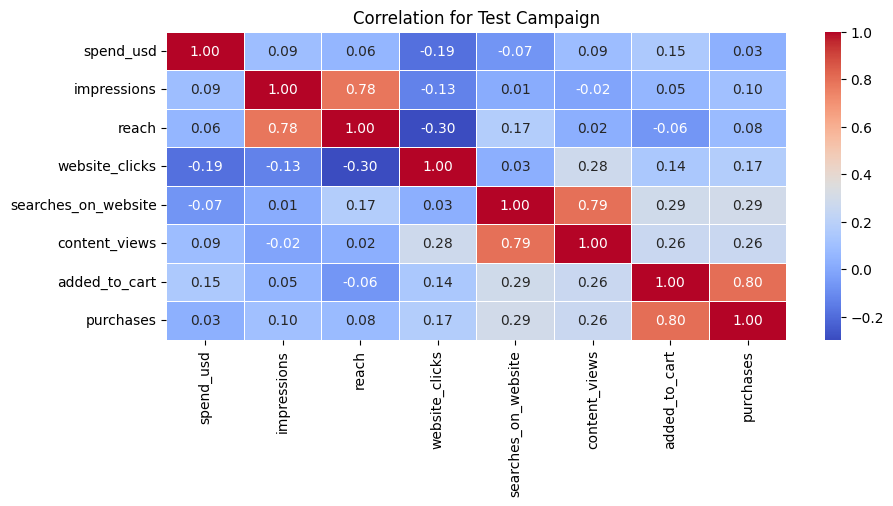

In [126]:
correlation_matrix = test.corr(numeric_only = True)

plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation for Test Campaign')
plt.show()

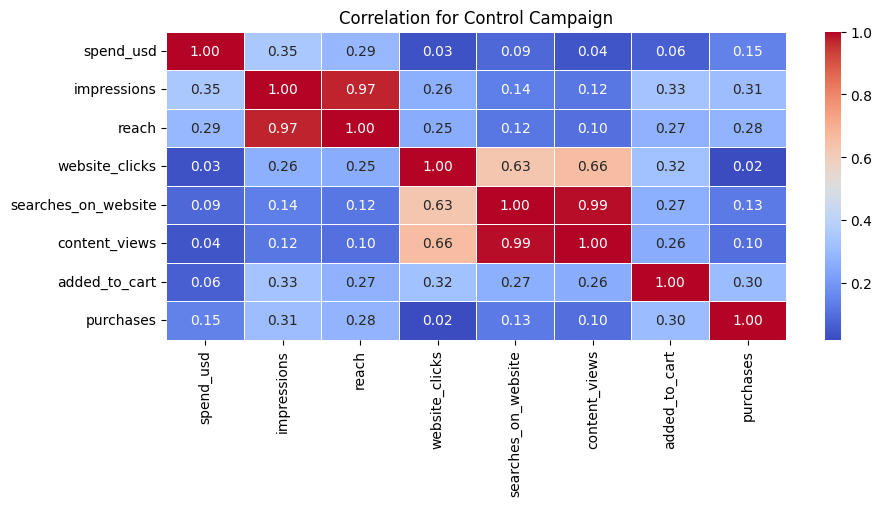

In [127]:
correlation_matrix = control.corr(numeric_only = True)

plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation for Control Campaign')
plt.show()

Based on the correlation matrices above it can be observed that for the test campaign there is a strong correlation between users adding items to cart and the number of users making purchases. However, that correlation is much lower in the control campaign. 

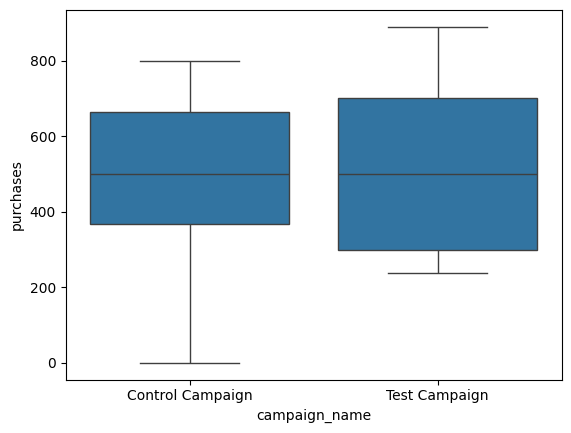

In [128]:
sns.boxplot(y='purchases', x='campaign_name', data=campaigns);

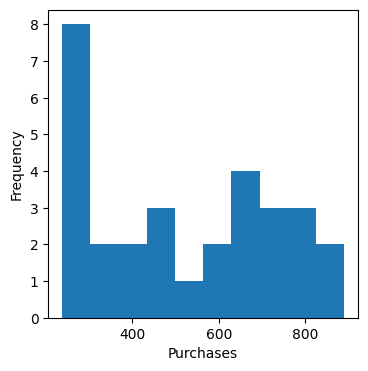

In [129]:
ax = (test['purchases']).plot.hist(figsize=(4,4))
ax.set_xlabel('Purchases');

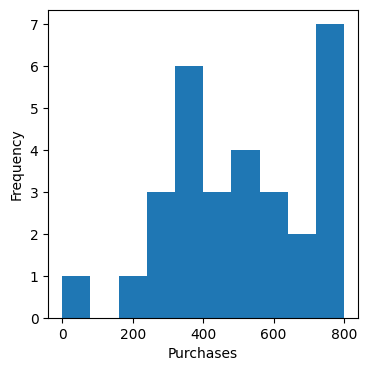

In [130]:
ax = (control['purchases']).plot.hist(figsize=(4,4))
ax.set_xlabel('Purchases');

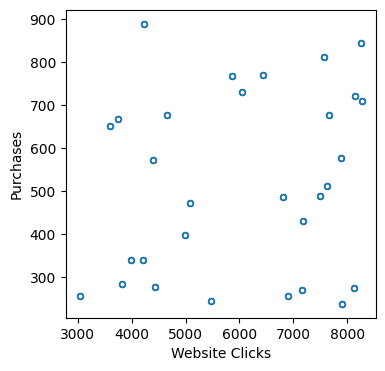

In [75]:
ax = test.plot.scatter(x='website_clicks', y='purchases', figsize=(4,4), marker='$\u25EF$')
ax.set_xlabel('Website Clicks')
ax.set_ylabel('Purchases');

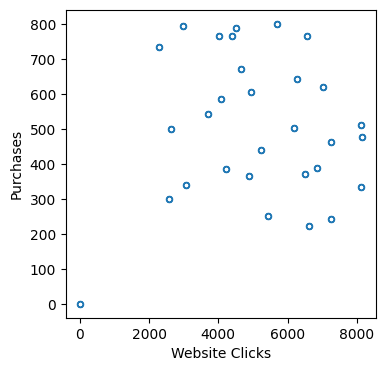

In [74]:
ax = control.plot.scatter(x='website_clicks', y='purchases', figsize=(4,4), marker='$\u25EF$')
ax.set_xlabel('Website Clicks')
ax.set_ylabel('Purchases');

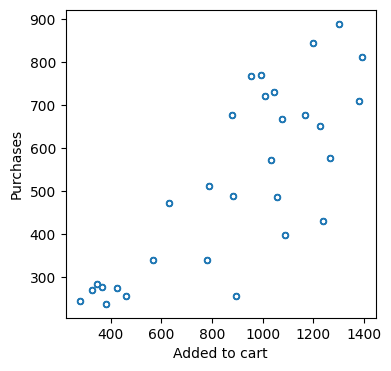

In [66]:
ax = test.plot.scatter(x='added_to_cart', y='purchases', figsize=(4,4), marker='$\u25EF$')
ax.set_xlabel('Added to cart')
ax.set_ylabel('Purchases');

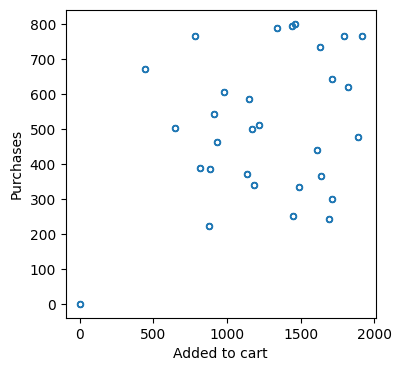

In [67]:
ax = control.plot.scatter(x='added_to_cart', y='purchases', figsize=(4,4), marker='$\u25EF$')
ax.set_xlabel('Added to cart')
ax.set_ylabel('Purchases');

<a id="probability"></a>
## Probability

In [76]:
# Calculate probability of converting website clicks to purchases regardless of ad campaign
total_website_clicks = campaigns['website_clicks'].sum()
total_purchases = campaigns['purchases'].sum()

converted = total_purchases / total_website_clicks
print(converted)

0.09185946974555063


In [77]:
# Calculate probablity of converting website clicks to purchases in the control campaign
control_website_clicks = control['website_clicks'].sum()
control_purchases = control['purchases'].sum()

control_converted = control_purchases / control_website_clicks
print(control_converted)

0.09825473257162855


In [78]:
# Calculate probablity of converting website clicks to purchases in the test campaign
test_website_clicks = test['website_clicks'].sum()
test_purchases = test['purchases'].sum()

test_converted = test_purchases / test_website_clicks
print(test_converted)

0.08640658672708183


In [84]:
# Calculate probability that a website click was from the test campaign
test['impressions'].sum() / campaigns['impressions'].sum()

0.4132292059303643

##### Probablity Conclusion

The probability of a website visitor making a purchase for the `control` campaign is ~9.19%. The probability of a website visitor making a purchase for the `test` campaign is ~8.64% which is lower than the `control` campaign. Combined with the fact that the probability that the ad shown to an individual was from the `test` campaign is ~41.32% this would lead me to conclude that the `test` campaign does not lead to more purchases.

<a id="hypothesis"></a>
## Hypothesis Testing

In [42]:
# Total number of purchases for the control campaign
control_purchases = control['purchases'].sum()
# Total number of purchases for the test campaign
test_purchases = test['purchases'].sum()
# Total number of website visits associated with the control campaign
n_control = control['website_clicks'].sum()
# Total number or website visits associated with the test campaign
n_test = test['website_clicks'].sum()

# Confirm values for the variable above
print(f'Control purchases: {control_purchases}')
print(f'Test purchases: {test_purchases}')
print(f'Total website visits for the control: {n_control}')
print(f'Total website visits for the test: {n_test}')

Control purchases: 15161
Test purchases: 15637
Total website visits for the control: 154303
Total website visits for the test: 180970


In [89]:
# Test for proportions based on normal (z) test
count = np.array([test_purchases, control_purchases])
nobs = np.array([n_test, n_control])
z_score, p_val = sm.stats.proportions_ztest(count, nobs, alternative='larger')
print(f'The z-score is {z_score:.3f}')
print(f'The p-value is {p_val:.3f}')

The z-score is -11.839
The p-value is 1.000


The p-value is the probability of getting a result equal or more extreme than the observed statistic. The closer to 0 the p-value is, the more statistically significant the results are. The closer to 1 the p-value is, the less statistically significant the results are.

Therefore, with the `p-value` from above being equal to 1.0 and the Type 1 error rate of 0.05 it means that there is no statistically significant difference between the the test and control campaigns and therefore we should fail to reject the null hypothesis.

Also, the z-score represents how the observed value relates to the mean of the null and alternative hypotheses. It is measured in terms of standard deviations from the mean. Therefore, the `z-score` of -11.839 shows that the observed statistic is 11.839 standard deviations _below_ the mean.

In [97]:
p_diffs = [] # Create empty array to store diff values from simulation

# Adding the differences of the 100,000 simulations to the p_diffs array
p_diffs.append(
    (np.random.binomial(n_test, converted, 100000) / n_test) - (np.random.binomial(n_control, converted, 100000) / n_control)
)

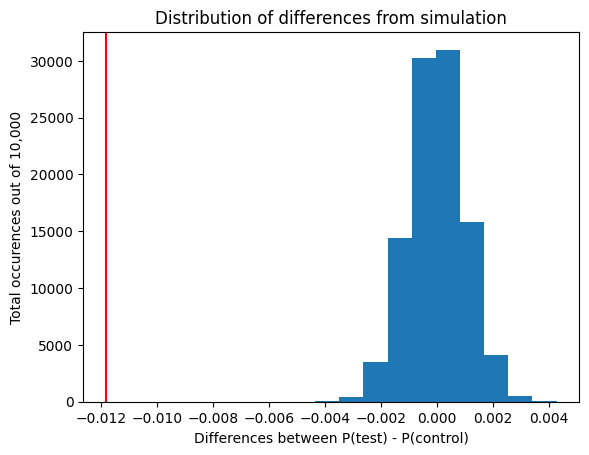

In [96]:
# Calculate observed difference in conversion from data
obs_diff = test_converted - control_converted
# Plot histogram
plt.hist(p_diffs) # Shows all p_diffs from the 100,000 simulations. Shows as normal distribution as expected
plt.axvline(x=obs_diff, color='red') # Shows the observed difference on the plot 
plt.title('Distribution of differences from simulation')
plt.xlabel('Differences between P(test) - P(control)')
plt.ylabel('Total occurences out of 100,000');

In [92]:
p_value = (p_diffs > conversion_diff).mean()
print(p_value)
print(obs_diff)

1.0
-0.011848145844546715


After the simulation the `p_value` is the same as the `p_value` calculated above using the z test. Also, in the histogram we can see that the observed difference aligns with the z-score value calculated above as well. All of this confirms that we should fail to reject the null hypothesis.

<a id="conclusion"></a>
## Conclusion

#### Hypotheses

Null hypothesis: The conversion rate for the test campaign is equal to or less than the conversion rate for the control campaign.

Alternative hypothesis: The conversion rate for the test campaign is greater than the conversion rate for the control campaign.

Conversion rate for this analysis will be defined as the number of purchases divided by the number of website clicks.

Type 1 error rate of 5%

#### Conclusions from analysis
After analyzing the data based on the hypotheses and Type 1 error rate, I have to fail to reject the null hypothesis. This means there is not a statistical significance in the conversion rate for the test campaign and the control campaign. 

An interesting observation is that the test campaign showed a higher correlation to users adding items to the cart and the number of purchases as compared to the control campaign. 

#### Recommendations
1. Due to the average spend of each campaign and that we failed to reject the null hypothesis, it is recommended to choose the control campaign over the test campaign.
2. The test campaign did show a higher correlation to users adding items to the cart and completing purchases, so I recommend a deeper analysis into the specific features or strategies implemented in the test campaign.